# grab img

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import os
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
import os
# 設定爬蟲目標網站的 URL
url = 'https://irs.thsrc.com.tw/IMINT/?utm_source=thsrc&utm_medium=textlink&utm_term=booking'

# 設定儲存圖片的資料夾路徑
# folder_path = 'img'

# 創建資料夾（如果不存在）
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# 設定編號起始值
counter = 0

# 初始化 Selenium WebDriver
driver = webdriver.Chrome()  # 需要安裝 Chrome 瀏覽器和對應版本的 WebDriver
# 初始化 Selenium WebDriver
driver = webdriver.Edge()  # 需要安裝 Edge 瀏覽器和對應版本的 WebDriver
for k in range(500):
    if k%2==0:
        driver = webdriver.Chrome()  # 需要安裝 Chrome 瀏覽器和對應版本的 WebDriver
    else:
        driver = webdriver.Edge()  # 需要安裝 Edge 瀏覽器和對應版本的 WebDriver
    try:
        # 發送 GET 請求獲取網頁內容
        driver.get(url)
        time.sleep(1.3)  # 等待網頁加載完成

        # 解析網頁內容，提取圖片 URL
        img_tag = driver.find_elements(By.CSS_SELECTOR, '.captcha-img')
        img_element = img_tag[0]

        # 解析網頁內容，提取按鈕元素
        button_element = driver.find_element(By.ID, 'cookieAccpetBtn')
        # 模擬點擊 "我同意" 按鈕
        button_element.click()
        time.sleep(0.2)  # 等待圖片下載框出現

        # 模擬滑鼠點擊圖片
        driver.execute_script("arguments[0].click();", img_element)
        time.sleep(0.5)  # 等待圖片下載框出現

        # 另存圖片並使用計數器編號命名
        # img_path = os.path.join(folder_path, f'{counter}.jpg')
        driver.find_element(By.CSS_SELECTOR, '#BookingS1Form_homeCaptcha_passCode').screenshot(img_path)
        print(f'Saved {counter}.jpg')

        # 增加編號計數器
        counter += 1
    finally:
        # k += 1
        # 關閉瀏覽器視窗
        driver.quit()
        # driver.refresh()


# 循環結束後關閉瀏覽器視窗
driver.quit()

## fix img

In [ ]:
import cv2
import numpy as np

# 讀取圖片
image = cv2.imread('img/0.jpg')
image = cv2.resize(image, (140, 50))
cv2.imshow('Image', image)
_, image = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)
denoised_image = image

# 去除胡椒鹽雜訊
# kernel = np.ones((3, 3), np.uint8)
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
denoised_image = cv2.dilate(denoised_image, kernel1, iterations=2)
denoised_image = cv2.erode(denoised_image, kernel1, iterations=1)

kernel = np.ones((3, 3), dtype=np.uint8)
# kernel[1, :] = 0
kernel[:, 1] = 0
# kernel[2, 0] = 0
# kernel[0, -1] = 0
denoised_image = cv2.dilate(denoised_image, kernel, iterations=1)
denoised_image = cv2.erode(denoised_image, kernel, iterations=1)

# 調整圖片顏色
gray_image = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY)

# 將超過 200 的像素值調整為 255，其他調整為 0
# gray_image[gray_image > 200] = 255
# gray_image[gray_image <= 200] = 0

# 顯示處理後的圖片
# cv2.imshow('Image', image)
cv2.imshow('Processed Image', gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import numpy as np
kernel = np.ones((3, 6), dtype=np.uint8)
kernel[1, 1:-1] = 0
kernel[2, 0] = 0
kernel[0, -1] = 0
kernel

## save fix_img

In [91]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np
# 資料夾路徑
folder_path = "img"
# 資料夾路徑
# save_folder_path = "fix_img"
# save_folder_path = "fix_img2"
save_folder_path = "fix_img3"

mask1 = cv2.imread("templ.jpg", 0)

mask1 = cv2.imread("output.png", 0)
mask1 = cv2.resize(mask1, (140, 50))

mask1 = 255 - mask1 

# mask = cv2.erode(mask, (3, 3), iterations=1)
# plt.imshow(mask)
# plt.show()

# 創建資料夾（如果不存在）
if not os.path.exists(save_folder_path):
    os.makedirs(save_folder_path)
# 目標寬度和高度
target_width = 140
target_height = 50

# 列出資料夾中的所有檔案
file_list = os.listdir(folder_path)
# print(file_list)
# 遍歷每個檔案
from tqdm import tqdm

# 計算文件總數
total_files = len(file_list)

for file_name in tqdm(file_list, desc="Processing images", unit="image", total=total_files):
    if save_folder_path == "fix_img":
        # 檔案路徑
        file_path = os.path.join(folder_path, file_name)

        # 讀取圖片
        image = cv2.imread(file_path, 0 )

        resized_image = cv2.resize(image, (target_width*5, target_height*5))
        mask1 = cv2.resize(mask1, (target_width*5, target_height*5))

        denoised_image = resized_image
        denoised_image = cv2.inpaint(denoised_image, mask1, 5, cv2.INPAINT_TELEA)
        denoised_image = cv2.GaussianBlur(denoised_image, (9, 15), 5)
        kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 8))
        kernel = np.ones((8, 3), dtype=np.uint8)
        kernel[1, :] = 0

        denoised_image = cv2.dilate(denoised_image, kernel1, iterations=3)
        denoised_image = cv2.GaussianBlur(denoised_image, (5, 5), 2)
        denoised_image = cv2.erode(denoised_image, kernel, iterations=4)

        _, denoised_image = cv2.threshold(denoised_image, 220, 255, cv2.THRESH_OTSU)
        denoised_image = cv2.dilate(denoised_image, kernel1, iterations=1)
        denoised_image = cv2.resize(denoised_image, (target_width, target_height))
        
        # 調整圖片顏色
        # final_image = cv2.cvtColor(denoised_image, cv2.COLOR_GRAY)
        final_image = denoised_image

        print(file_name)
        # 儲存調整後的圖片
        output_file_path = os.path.join(save_folder_path, file_name)
        cv2.imwrite(output_file_path, final_image)
    if save_folder_path == "fix_img2":
        # 檔案路徑
        file_path = os.path.join(folder_path, file_name)

        # 讀取圖片
        image = cv2.imread(file_path, 0 )

        resized_image = cv2.resize(image, (target_width*5, target_height*5))
        mask1 = cv2.resize(mask1, (target_width*5, target_height*5))

        denoised_image = resized_image
        _, denoised_image = cv2.threshold(denoised_image, 0, 255, cv2.THRESH_OTSU)    
        denoised_image = cv2.GaussianBlur(denoised_image, (9, 11), 3)
        denoised_image = cv2.inpaint(denoised_image, mask1, 2, cv2.INPAINT_TELEA)
        kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 8))
        kernel = np.ones((8, 3), dtype=np.uint8)
        kernel[1, :] = 0

        # denoised_image = cv2.GaussianBlur(denoised_image, (5, 5), 2)
        denoised_image = cv2.dilate(denoised_image, kernel1, iterations=3)
        denoised_image = cv2.erode(denoised_image, kernel, iterations=4)

        

        # _, denoised_image = cv2.threshold(denoised_image, 0, 255, cv2.THRESH_OTSU)
        # _, denoised_image = cv2.threshold(denoised_image, 150, 255, cv2.THRESH_BINARY)
        denoised_image = cv2.dilate(denoised_image, kernel1, iterations=3)
        denoised_image = cv2.erode(denoised_image, kernel, iterations=2)
        denoised_image = cv2.inpaint(denoised_image, mask1, 2, cv2.INPAINT_NS)
        denoised_image = cv2.inpaint(denoised_image, mask1, 5, cv2.INPAINT_TELEA)
        denoised_image = cv2.inpaint(denoised_image, mask1, 3, cv2.INPAINT_TELEA)

        denoised_image = cv2.resize(denoised_image, (target_width, target_height))
        
        # 調整圖片顏色
        # final_image = cv2.cvtColor(denoised_image, cv2.COLOR_GRAY)
        final_image = denoised_image

        # print(file_name)
        # 儲存調整後的圖片
        output_file_path = os.path.join(save_folder_path, file_name)
        cv2.imwrite(output_file_path, final_image)

    if save_folder_path == "fix_img3":
        # 檔案路徑
        file_path = os.path.join(folder_path, file_name)

        # 讀取圖片
        image = cv2.imread(file_path, 0 )

        resized_image = cv2.resize(image, (target_width*5, target_height*5))
        mask1 = cv2.resize(mask1, (target_width*5, target_height*5))

        denoised_image = resized_image
        # denoised_image = denoised_image - mask1
        _, denoised_image = cv2.threshold(denoised_image, 0, 255, cv2.THRESH_OTSU)
        # denoised_image[mask1 > 0] = 255 - denoised_image[mask1 > 0]
        # _, denoised_image = cv2.threshold(denoised_image, 110, 255, cv2.THRESH_BINARY)    
        # denoised_image = cv2.GaussianBlur(denoised_image, (9, 11), 3)
        denoised_image = cv2.inpaint(denoised_image, mask1, 2, cv2.INPAINT_TELEA)
        kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 8))
        kernel = np.ones((8, 3), dtype=np.uint8)
        kernel[1, :] = 0

        # denoised_image = cv2.GaussianBlur(denoised_image, (5, 5), 2)
        denoised_image = cv2.dilate(denoised_image, kernel1, iterations=3)
        denoised_image = cv2.erode(denoised_image, kernel, iterations=4)
        # 反轉被白線覆蓋的區域
        # denoised_image[mask1 > 0] = 255 - denoised_image[mask1 > 0]
        # denoised_image = denoised_image - (mask1+255)

        # _, denoised_image = cv2.threshold(denoised_image, 0, 255, cv2.THRESH_OTSU)
        # _, denoised_image = cv2.threshold(denoised_image, 200, 255, cv2.THRESH_BINARY)
        denoised_image = cv2.dilate(denoised_image, kernel1, iterations=3)
        denoised_image = cv2.erode(denoised_image, kernel, iterations=2)
        # denoised_image = cv2.inpaint(denoised_image, mask1, 2, cv2.INPAINT_NS)
        # denoised_image = cv2.inpaint(denoised_image, mask1, 5, cv2.INPAINT_TELEA)
        # denoised_image = cv2.inpaint(denoised_image, mask1, 3, cv2.INPAINT_TELEA)

        denoised_image = cv2.resize(denoised_image, (target_width, target_height))
        
        # 調整圖片顏色
        # final_image = cv2.cvtColor(denoised_image, cv2.COLOR_GRAY)
        final_image = denoised_image

        # print(file_name)
        # 儲存調整後的圖片
        output_file_path = os.path.join(save_folder_path, file_name)
        cv2.imwrite(output_file_path, final_image)

Processing images: 100%|██████████| 551/551 [00:11<00:00, 46.33image/s]


## make mask

In [ ]:
from PIL import Image
import os

def overlay_images(folder_path, output_path, transparency=0.08):
    images = []
    
    # 讀取所有圖片
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        img = Image.open(file_path)
        images.append(img)

    # 確保所有圖片擁有相同的尺寸
    base_size = images[0].size
    images = [img.resize(base_size, Image.ANTIALIAS) for img in images]

    # 創建一個透明的底圖
    base = Image.new('RGBA', base_size, (0, 0, 0, 0))

    # 將每個圖片合併到底圖上，調整透明度
    for img in images:
        img = img.convert('RGBA')
        img = Image.blend(base, img, transparency)
        base = Image.alpha_composite(base, img)

    # 將底圖保存為輸出文件
    base.show()
    base = base.resize((140, 50))
    base.save(output_path, 'PNG')

# 資料夾路徑
folder_path = "img"
output_path = "output.png"

# 調整透明度並重疊圖片
overlay_images(folder_path, output_path, transparency=0.05)


### use mask

## combine file

In [1]:
import os
import shutil

# 資料夾路徑
source_folder1 = "fix_img"
source_folder2 = "fix_img2"
destination_folder = "data"

# 確保目的資料夾存在
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# 讀取fix_img資料夾的圖片
file_list1 = os.listdir(source_folder1)

# 讀取fix_img2資料夾的圖片
file_list2 = os.listdir(source_folder2)

# 將fix_img2的圖片重命名並移動到data資料夾
for file_name in file_list2:
    source_path = os.path.join(source_folder2, file_name)
    destination_name = str(int(file_name.split('.')[0]) + 551) + '.jpg'
    destination_path = os.path.join(destination_folder, destination_name)
    shutil.copyfile(source_path, destination_path)

# 將fix_img資料夾的圖片複製到data資料夾
for file_name in file_list1:
    source_path = os.path.join(source_folder1, file_name)
    destination_path = os.path.join(destination_folder, file_name)
    shutil.copyfile(source_path, destination_path)


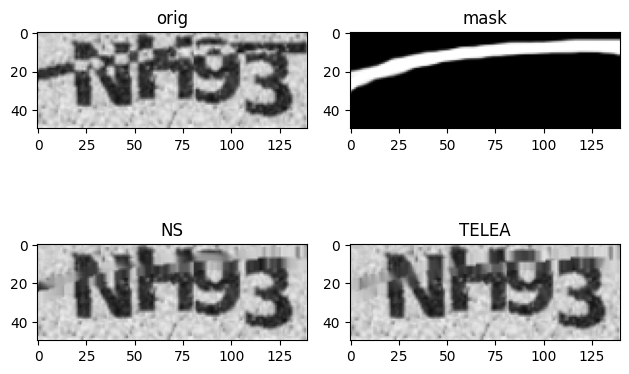

In [56]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("img/0.jpg")  
mask = cv2.imread("templ.jpg", 0)
mask = cv2.imread("output.png", 0)
mask = cv2.resize(mask, (140, 50))
img = cv2.resize(img, (140, 50))
# mask = cv2.imread("mask.jpg", 0)
mask = 255 - mask 

ns = cv2.inpaint(img, mask, 1, cv2.INPAINT_NS)
telea = cv2.inpaint(img, mask, 1, cv2.INPAINT_TELEA)
plt.subplot(221), plt.imshow(img)
plt.title("orig")
plt.subplot(222), plt.imshow(mask, cmap='gray')
plt.title("mask")
plt.subplot(223), plt.imshow(ns)
plt.title("NS")
plt.subplot(224), plt.imshow(telea)
plt.title("TELEA")
plt.tight_layout()
plt.show()

# train file

In [95]:
import cv2
import time

# # 設定範圍上限
# S_num_images = 450
# E_num_images = 551
# 開啟 label.txt 檔案以供寫入
with open('label.txt', 'a+') as file:
    for i in range(S_num_images, E_num_images):
        # 構建圖片檔案名稱
        image_filename = f'img/{i}.jpg'

        # 讀取圖片
        image = cv2.imread(image_filename)
        image = cv2.resize(image, (280, 100))
        # 顯示圖片
        cv2.imshow( image_filename, image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        # 輸入標籤
        label = input(f'請輸入圖片 {image_filename} 的標籤：')

        # 將標籤寫入 label.txt 檔案
        file.write(f'{image_filename}: {label}\n')

        # cv2.imshow( image_filename, image)
        # cv2.waitKey(1000)  # 1500 毫秒（1.5 秒）
        # cv2.destroyAllWindows()


In [2]:
cut = 1001

# 开启 label.txt 文件以供读取
with open('label.txt', 'r') as file:
    lines = file.readlines()

# 处理每一行数据
new_lines = []
for line in lines:
    parts = line.split(':')
    label = parts[1].strip()
    new_lines.append(label)

# 开启 new_label.txt 文件以供写入
with open('label_train.txt', 'w') as file:
    for line in new_lines[:cut]:
        file.write(f'{line}\n')

# 开启 new_label.txt 文件以供写入
with open('label_test.txt', 'w') as file:
    for line in new_lines[cut:]:
        file.write(f'{line}\n')

重複資料及其重複次數:
DT6V: 3 次 	72Y6: 2 次 	WMDC: 3 次 	5RFN: 2 次 	
2WW9: 5 次 	WMDN: 3 次 	F37G: 3 次 	55N6: 2 次 	
WR55: 2 次 	W4HV: 3 次 	Z2Y2: 2 次 	Y6P3: 2 次 	
ZTW4: 2 次 	GTG4: 2 次 	DK2H: 2 次 	VMDG: 3 次 	
ZR5G: 3 次 	FN6V: 2 次 	9WMR: 2 次 	R7NK: 4 次 	
CWCG: 2 次 	Y44V: 2 次 	H2DK: 2 次 	FFC4: 4 次 	
7YT9: 2 次 	KRZY: 2 次 	GNKK: 2 次 	WWY2: 2 次 	
CZDV: 3 次 	GP3G: 2 次 	P5FF: 3 次 	N6TG: 2 次 	
NGMY: 2 次 	RZVP: 2 次 	H3MT: 2 次 	2DKK: 3 次 	
CKHD: 2 次 	577M: 2 次 	96ND: 2 次 	2MNP: 2 次 	
TGM7: 2 次 	2T37: 2 次 	5PTT: 2 次 	TCD6: 3 次 	
GKYN: 2 次 	7FCG: 2 次 	FCRK: 2 次 	PKFP: 2 次 	
6W3K: 3 次 	RT6T: 5 次 	VFH4: 2 次 	Y25Z: 2 次 	
W9NF: 2 次 	VFHP: 3 次 	GD6V: 3 次 	K75Y: 2 次 	
2553: 3 次 	DKZT: 3 次 	R6FW: 2 次 	R6VZ: 2 次 	
4DGW: 2 次 	MZKP: 2 次 	WTVR: 2 次 	27C2: 2 次 	
FNHD: 3 次 	WTN9: 2 次 	6C4G: 2 次 	2G55: 2 次 	
Y3WT: 2 次 	P6N7: 2 次 	FV7G: 2 次 	YD9V: 2 次 	
C3KH: 2 次 	KHP3: 3 次 	MN95: 2 次 	7Z22: 3 次 	
3THV: 2 次 	5M76: 2 次 	N3MD: 2 次 	NR9G: 3 次 	
MTVT: 2 次 	KVKN: 2 次 	DK35: 2 次 	5F75: 2 次 	
WMCG: 2 次 	9YYV: 4 次 	4H75: 2 次 	T9VH: 2 次 

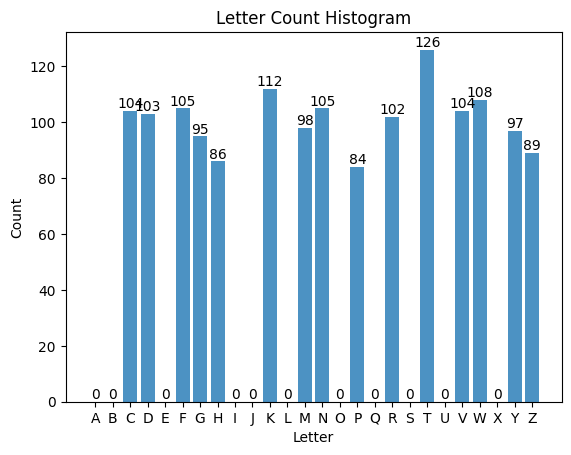

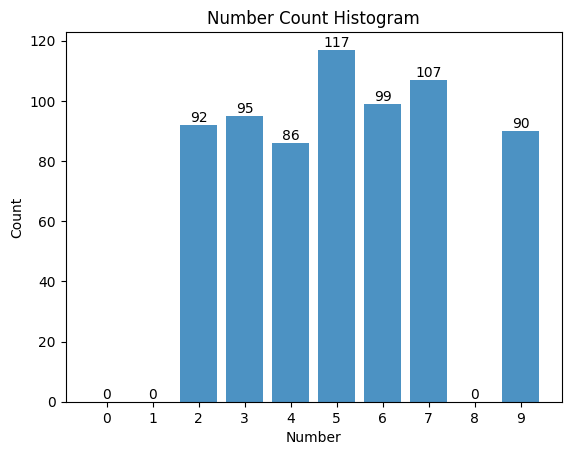

字母總數: 1518
數字總數: 686


In [8]:
from collections import Counter

# 讀取new_label.txt的內容
with open("new_label.txt", "r") as file:
    content = file.read().split()

# 初始化計數器
line_counter = Counter(content)

# 計數器
count = 0
# 計數器
count2 = 0
# 打印重複資料及其重複次數
print("重複資料及其重複次數:")
for line, line_count in line_counter.items():
    if line_count > 1:
        count2+=1
        print(f"{line}: {line_count} 次 ", end="\t")
        count += 1
        if count % 4 == 0:
            print()  # 換行

from collections import Counter
print()  # 換行
print("共有:",count2)

from collections import Counter

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

# 读取 new_label.txt 的内容
with open("new_label.txt", "r") as file:
    content = file.read().split()

# 初始化计数器
common_letter_counter = Counter()
common_number_counter = Counter()

# 遍历每个内容，进行计数
total_letter_count = 0
total_number_count = 0

for item in content:
    # 确保 item 的长度为 4
    item = item[:4]
    for char in item:
        if char.isalpha():
            common_letter_counter[char] += 1
            total_letter_count += 1
        elif char.isdigit():
            common_number_counter[char] += 1
            total_number_count += 1

# 获取字母和数字的标签和计数
letters = [chr(ord('A') + i) for i in range(26)]
letter_counts = [common_letter_counter.get(letter, 0) for letter in letters]

numbers = [str(i) for i in range(10)]
number_counts = [common_number_counter.get(number, 0) for number in numbers]

# 绘制字母的数量长方形图
plt.bar(np.arange(len(letters)), letter_counts, align='center', alpha=0.8)
plt.xticks(np.arange(len(letters)), letters)
plt.xlabel('Letter')
plt.ylabel('Count')
plt.title('Letter Count Histogram')

# 在每个端点标出数量
for i, count in enumerate(letter_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

# 绘制数字的数量长方形图
plt.bar(np.arange(len(numbers)), number_counts, align='center', alpha=0.8)
plt.xticks(np.arange(len(numbers)), numbers)
plt.xlabel('Number')
plt.ylabel('Count')
plt.title('Number Count Histogram')

# 在每个端点标出数量
for i, count in enumerate(number_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

# 打印总数
print(f"字母總數: {total_letter_count}")
print(f"數字總數: {total_number_count}")



# Tesseract-pytesseract

In [106]:
import pytesseract
import cv2

# 设置 Tesseract OCR 的路径（根据你的安装路径进行调整）
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\Administrator\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

# 读取图像
img = cv2.imread('fix_img/212.jpg')
# O = 16, 117, 341, 212, 122, 196, 390, 542
# X = 141, 24, 

# 将图像转换为灰度图像
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 使用 Tesseract OCR 进行字符识别
result = pytesseract.image_to_string(gray, lang='eng', config='--psm 6')

# 打印识别结果
print(result)

7Z22

